In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
from utils import *
from OFDM import *
import matplotlib.pyplot as plt

In [3]:
N=16
V=2
H = np.array([1,1])
noise_variance=0.2

In [24]:
transmitter = OFDM_transmitter(V)
receiver = OFDM_receiver(V, H, N)

# Create bits
N_bits = 1 * N
bits = utils.generate_bits(N_bits)
bits_received = np.array([])

# Pass through transmitter
bits_sent = bits
signal = transmitter(bits_sent)
assert(np.sum(np.abs(np.imag(signal))) == 0)

# Pass through channel
signal = np.convolve(signal, H, 'same')

# Add AWGN noise
noise = np.sqrt(noise_variance)*np.random.randn(*signal.shape)
signal += noise

# Pass through receiver
rec = receiver(signal)
bits_received = np.concatenate((bits_received, rec))
pe = utils.probability_of_bit_error(bits, bits_received)

0.25


d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


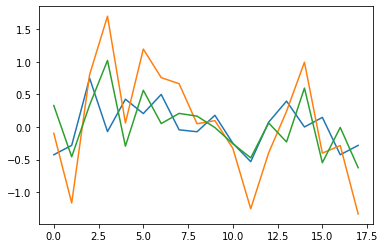

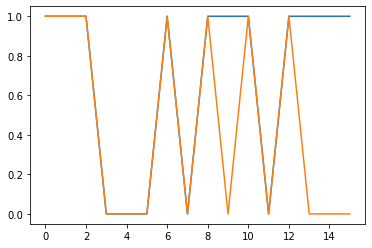

In [25]:
print(pe)

plt.plot(transmitter(bits_sent))
plt.plot(signal)
plt.plot(noise)
plt.show()

plt.plot(bits)
plt.plot(bits_received)
plt.show()

In [ ]:

plt.plot(signal)

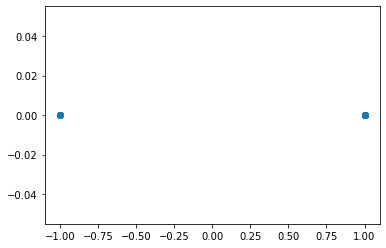

In [11]:
s = utils.encode_2PAM(bits)
plt.scatter(np.real(s), np.imag(s))